In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for better visualizations
sns.set(style="whitegrid")

# Load the dataset
# Assuming your data is in a CSV file named 'bot_human_tweets.csv'
data = pd.read_csv("twitter_human_bots_dataset.csv")
print("Data loaded successfully.")
print("Dataset Overview:")
data.head()


Data loaded successfully.
Dataset Overview:


,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [30]:
# Display basic information about the dataset
print("\nDataset Information:")
data.info()

# Check for any missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

# Drop rows or handle missing data as needed (e.g., dropping rows with missing essential data like 'account_type')
data = data.dropna(subset=["account_type"])  # Drop rows where 'account_type' is missing



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    37438 non-null  int64  
 1   created_at                    37438 non-null  object 
 2   default_profile               37438 non-null  bool   
 3   default_profile_image         37438 non-null  bool   
 4   description                   30182 non-null  object 
 5   favourites_count              37438 non-null  int64  
 6   followers_count               37438 non-null  int64  
 7   friends_count                 37438 non-null  int64  
 8   geo_enabled                   37438 non-null  bool   
 9   id                            37438 non-null  int64  
 10  lang                          29481 non-null  object 
 11  location                      37435 non-null  object 
 12  profile_background_image_url  32939 no


Dataset Shape: (37438, 20)
Class Distribution (Human vs Bot):
human    25013
bot      12425
Name: account_type, dtype: int64


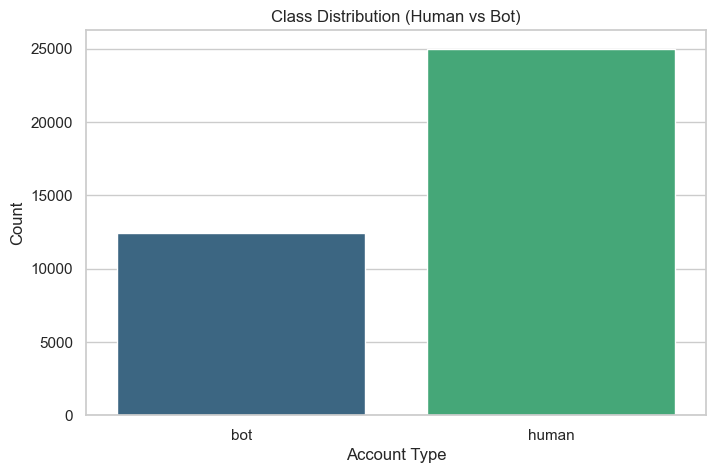


Class Distribution (in percentage):
human    66.811796
bot      33.188204
Name: account_type, dtype: float64


In [31]:
# Check dataset shape and balance of classes
print(f"\nDataset Shape: {data.shape}")
print("Class Distribution (Human vs Bot):")
print(data['account_type'].value_counts())

# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="account_type", data=data, palette="viridis")
plt.title("Class Distribution (Human vs Bot)")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.show()

# Report percentage of each class
class_distribution = data['account_type'].value_counts(normalize=True) * 100
print("\nClass Distribution (in percentage):")
print(class_distribution)


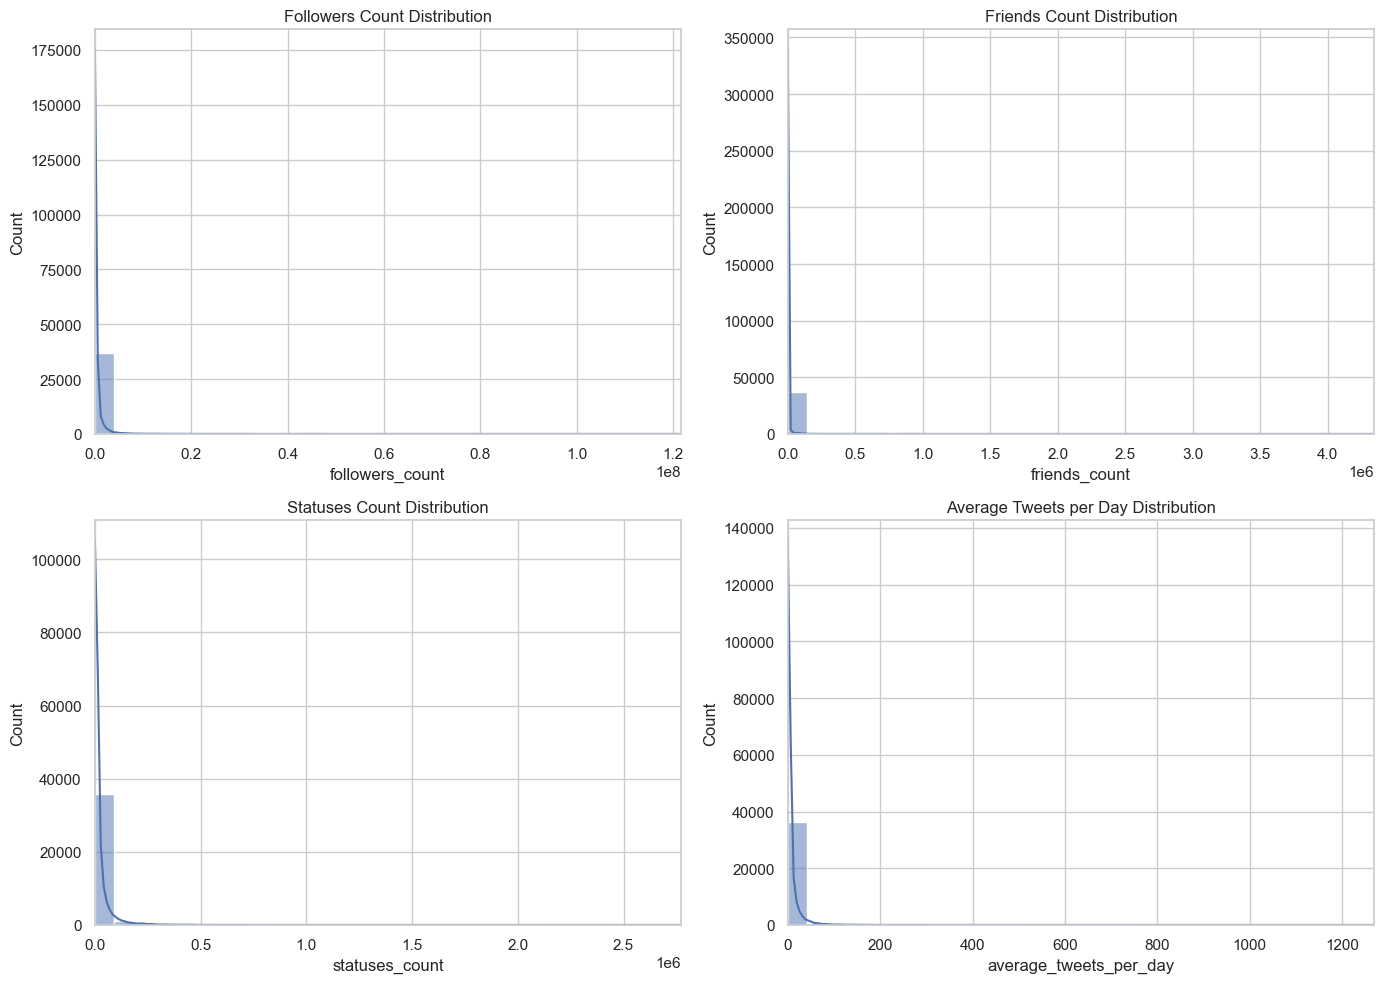

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze individual features to check distributions and outliers
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Define the columns to plot and the axes titles
columns_to_plot = ['followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day']
titles = ['Followers Count Distribution', 'Friends Count Distribution', 
          'Statuses Count Distribution', 'Average Tweets per Day Distribution']

# Plot each feature within its min and max range
for i, col in enumerate(columns_to_plot):
    row, col_pos = divmod(i, 2)
    sns.histplot(data[col], bins=30, kde=True, ax=axs[row, col_pos])
    axs[row, col_pos].set_title(titles[i])
    axs[row, col_pos].set_xlim(data[col].min(), data[col].max())  # Set x-axis range to min and max

plt.tight_layout()
plt.show()


TypeError: __init__() got an unexpected keyword argument 'color'

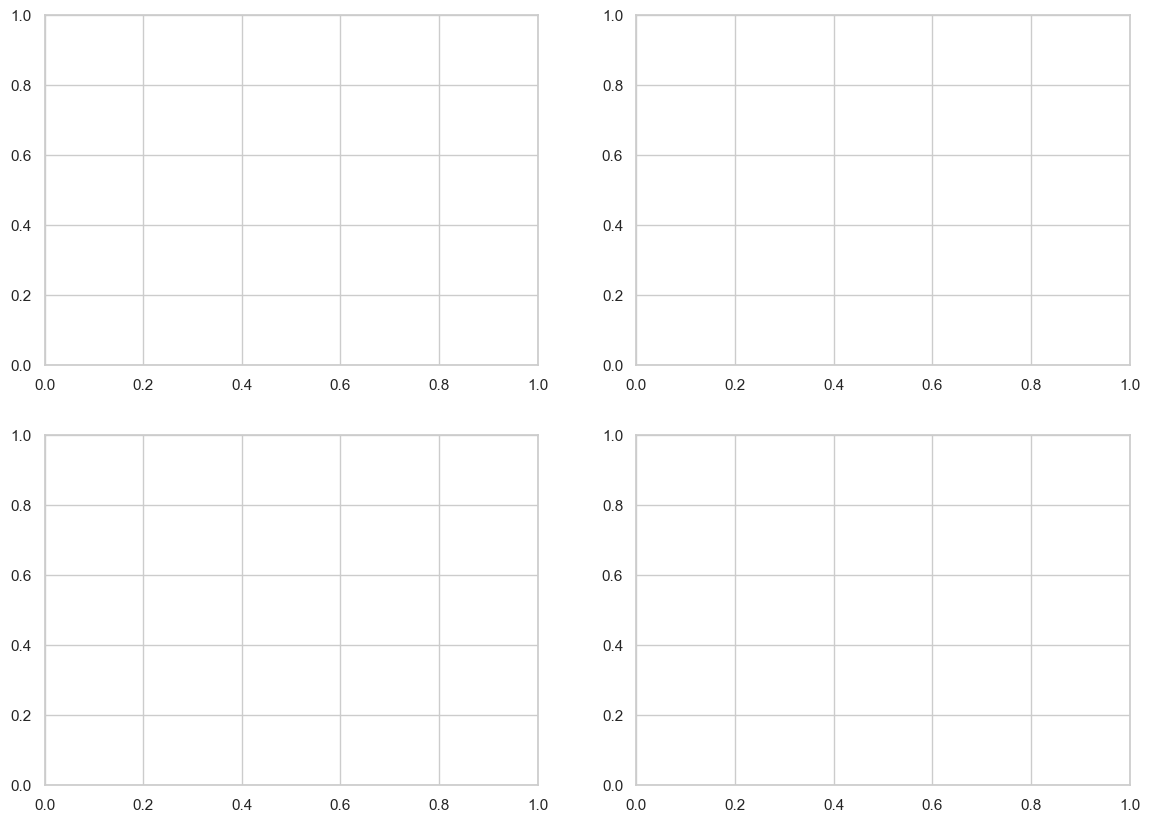

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze individual features to check distributions and outliers
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Define the columns to plot, titles, and colors
columns_to_plot = ['followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day']
titles = ['Followers Count Distribution', 'Friends Count Distribution', 
          'Statuses Count Distribution', 'Average Tweets per Day Distribution']
colors = ['navy', 'navy', 'navy', 'navy']  # Color palette for each plot

# Plot each feature within its 95% range
for i, col in enumerate(columns_to_plot):
    row, col_pos = divmod(i, 2)
    
    # Calculate the 2.5th and 97.5th percentiles
    lower_limit = data[col].quantile(0.025)
    upper_limit = data[col].quantile(0.975)
    
    # Plot histogram with KDE, focusing on the 95% data range and a color
    sns.histplot(data[col], bins=30, kde=True, ax=axs[row, col_pos],  kde_kws={'color': 'black'})
    
    # Set the title and limit the x-axis to 95% range
    axs[row, col_pos].set_title(titles[i], fontsize=14, fontweight='bold', color=colors[i])
    axs[row, col_pos].set_xlim(lower_limit, upper_limit)  # Set x-axis to 95% data range
    axs[row, col_pos].set_xlabel(col, fontsize=12)  # Label x-axis with column name
    axs[row, col_pos].set_ylabel('Frequency', fontsize=12)  # Label y-axis

# Enhance layout and display the plot
plt.tight_layout()
plt.show()



In [33]:
# Splitting the dataset into train, dev, and test sets (80% train, 10% dev, 10% test)
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['account_type'], random_state=42)
dev_data, test_data = train_test_split(test_data, test_size=0.5, stratify=test_data['account_type'], random_state=42)

# Confirming split sizes and distributions
print(f"\nTrain Set Size: {len(train_data)}")
print(f"Dev Set Size: {len(dev_data)}")
print(f"Test Set Size: {len(test_data)}")

# Distribution of classes in each split
print("\nClass Distribution in Train Set:")
print(train_data['account_type'].value_counts(normalize=True))
print("\nClass Distribution in Dev Set:")
print(dev_data['account_type'].value_counts(normalize=True))
print("\nClass Distribution in Test Set:")
print(test_data['account_type'].value_counts(normalize=True))



Train Set Size: 29950
Dev Set Size: 3744
Test Set Size: 3744

Class Distribution in Train Set:
human    0.668114
bot      0.331886
Name: account_type, dtype: float64

Class Distribution in Dev Set:
human    0.668269
bot      0.331731
Name: account_type, dtype: float64

Class Distribution in Test Set:
human    0.668002
bot      0.331998
Name: account_type, dtype: float64


In [34]:
# Define evaluation metrics: Accuracy, Precision, Recall, and F1-Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example function to calculate these metrics
def evaluate_model(y_true, y_pred):
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, pos_label='bot'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label='bot'):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, pos_label='bot'):.2f}")

# Example: If you have predictions and true labels
# y_pred_example = some_model.predict(X_test)  # Placeholder for actual model predictions
# evaluate_model(y_test, y_pred_example)


In [35]:
# Print summary of dataset and split characteristics for easy reporting
print("\nDataset and Split Summary:")
print(f"Total examples in dataset: {data.shape[0]}")
print(f"Train set: {len(train_data)} examples ({len(train_data)/len(data)*100:.1f}%)")
print(f"Dev set: {len(dev_data)} examples ({len(dev_data)/len(data)*100:.1f}%)")
print(f"Test set: {len(test_data)} examples ({len(test_data)/len(data)*100:.1f}%)")

print("\nClass Distribution in Full Dataset:")
print(class_distribution)

# Final notes and suggestions for documentation:
print("\nThis dataset has been split into train/dev/test sets, and class distribution remains consistent across all splits.")
print("Evaluation will be based on accuracy, precision, recall, and F1-score, focusing on detecting bots accurately.")



Dataset and Split Summary:
Total examples in dataset: 37438
Train set: 29950 examples (80.0%)
Dev set: 3744 examples (10.0%)
Test set: 3744 examples (10.0%)

Class Distribution in Full Dataset:
human    66.811796
bot      33.188204
Name: account_type, dtype: float64

This dataset has been split into train/dev/test sets, and class distribution remains consistent across all splits.
Evaluation will be based on accuracy, precision, recall, and F1-score, focusing on detecting bots accurately.
